In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style("whitegrid")

# Import dataset

In [4]:
data = pd.read_csv('diabetes.csv') #importing dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataset Desription

To get the central tendency of different fields of the dataset we can simply use describe() method. The central tendency includes mean, median, mode. 

The describe function lists out:
total count, mean, standard deviation, minimum value, First quartile(Q1), Median(Q2), Third Quartile(Q3), maximum value. 

In the dataset we have 'Outcome' as the target variable. The value 1 or 0 which indicates whether or not the subject has diabetes.


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Correlation between different fields

To find the correlation of different fields we use corr() and plot it using heatmap() function in seaborn.

By looking at the corelation we can infer which fields may be used to predict the targe variable. We can even remove redundant fields if we find too much correlation amongst them, hence reducing dimensionality in the dataset which may make it easier for different prediction algorithms to process and provide effective results.

From the below heatmap we can see the correlation between the fields. Lighter areas suggest more correlation and similarly darker areas suggest very little or no correlation.


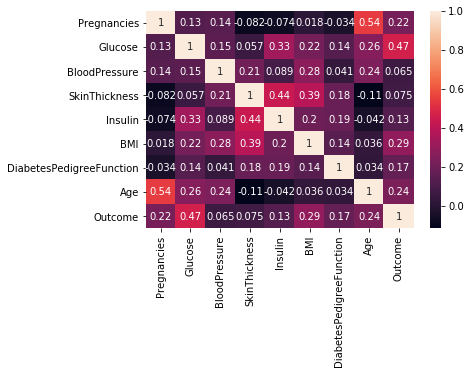

In [6]:
corr= data.corr()
sns.heatmap(corr,annot=True)

From above heatmap we can infer that 'Glucose' and 'Outcome' have a correlation coefficient of 0.47.
We also see a prominent correlation between 'Age' and 'Pregnancies' i.e. 0.54 which is self explanatory as the age of a woman increases the number of pregnancies she had would tend to increase.

# Visualizing data using different plots

## Pairplot

The pairplot is a method in seaborn that plots graphs of all the variables with respect to each other

The hue attribute can be used to differentiate between the classes of a particular feature. Here  the hue used is the 'Outcome' of the dataset.
Blue dots-> Outcome=0
Orange dots-> Outcome=1

The graph depicts increase in possibiity of Diabetes with increase in glucose levels.

C:\Users\win8.1\Anaconda3.5\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\win8.1\Anaconda3.5\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


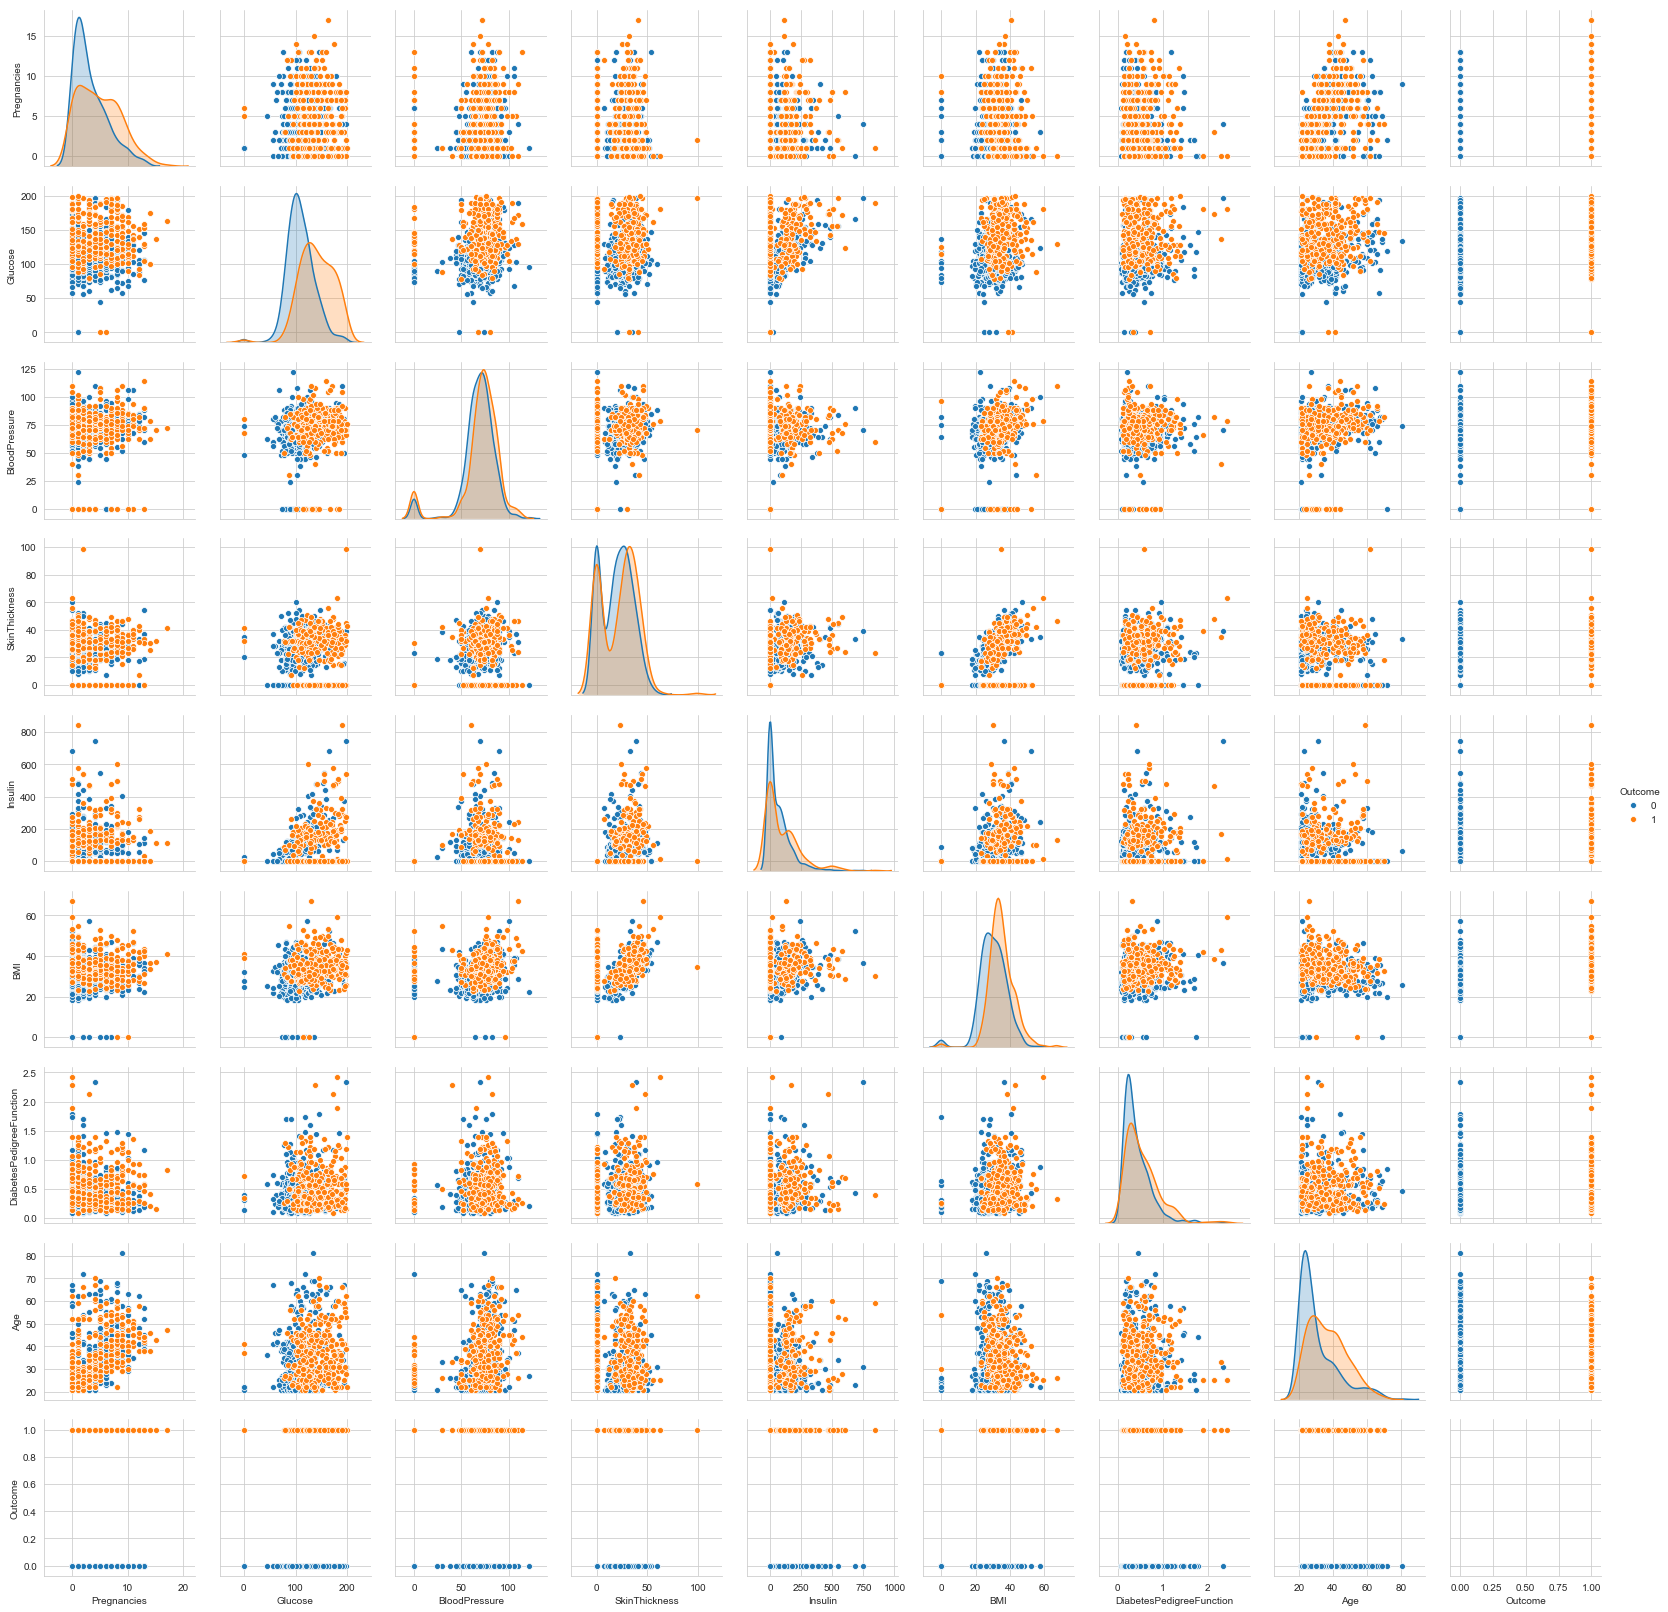

In [16]:
sns.pairplot(data,hue='Outcome')

## Distplot

We can use distplot to see the ditribution of the data in form of histograms and we can even draw a line of probability distribution using kde attribute.

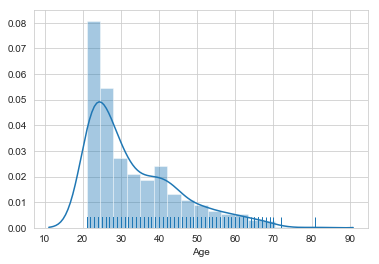

In [17]:
sns.distplot(data['Age'],kde=True,rug=True)

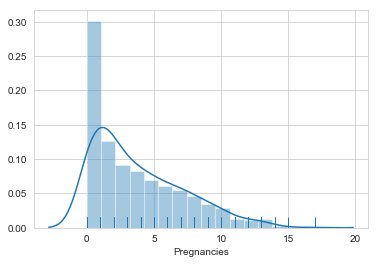

In [18]:
sns.distplot(data['Pregnancies'],kde=True,rug=True)

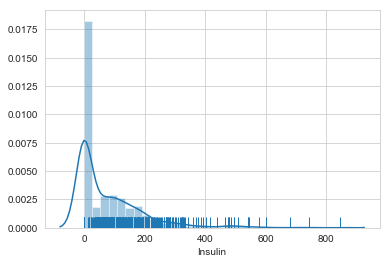

In [19]:
sns.distplot(data['Insulin'],kde=True,rug=True)

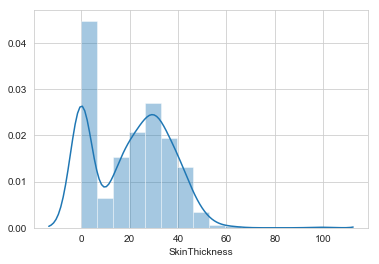

In [20]:
sns.distplot(data['SkinThickness'],kde=True)

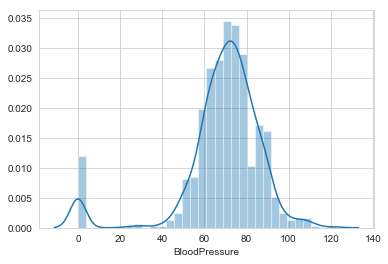

In [21]:
sns.distplot(data['BloodPressure'],kde=True)

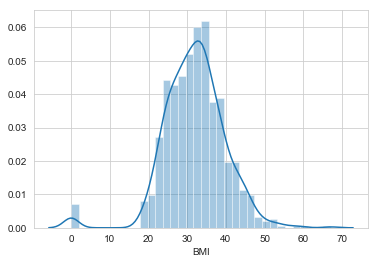

In [22]:
sns.distplot(data['BMI'],kde=True)

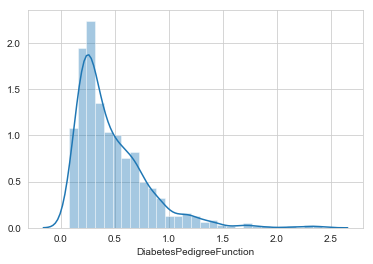

In [23]:
sns.distplot(data['DiabetesPedigreeFunction'],kde=True)

## Jointplot

Jointplots are used basically to see the relationship between the two field and it creates a simple bivariate graph.


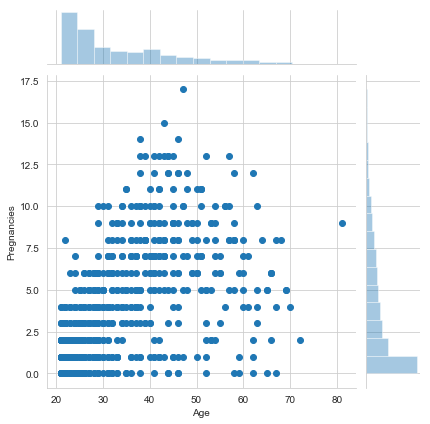

In [24]:
sns.jointplot(data['Age'],data['Pregnancies'])

We can use regression too with kind attribute equals reg

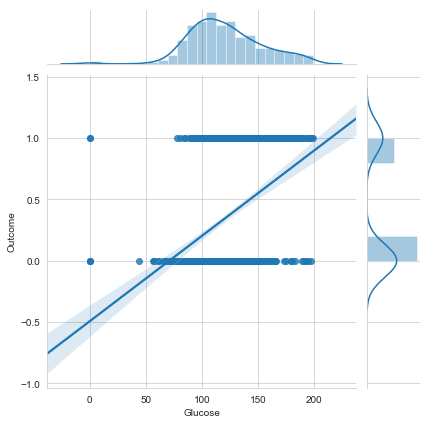

In [25]:
sns.jointplot(data['Glucose'],data['Outcome'],kind='reg')

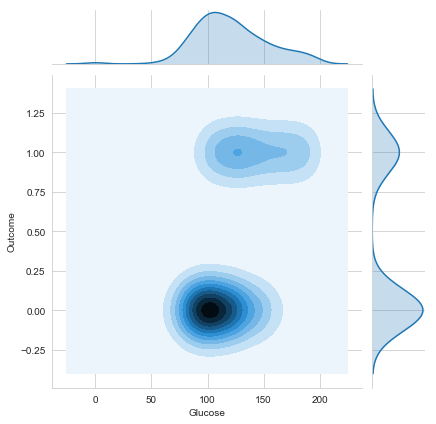

In [26]:
sns.jointplot(data['Glucose'],data['Outcome'],kind='kde')

## Lineplot

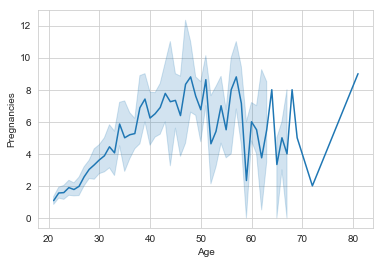

In [27]:
sns.lineplot(data['Age'],data['Pregnancies'])

## Countplot

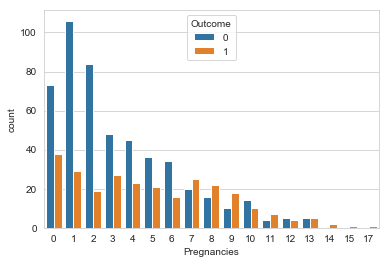

In [28]:
sns.countplot(x='Pregnancies',hue='Outcome',data=data)

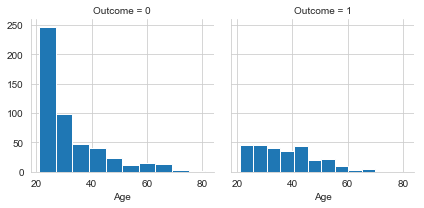

In [29]:
g = sns.FacetGrid(data,col='Outcome')
g.map(plt.hist,'Age')

We now explore the data and look at the mean values of different fields based on whether the Outcome is 0 or 1. We need to disregard the entries for which the values of the fields(Insulin, Skin thickness, Glucose) is equal to zero as these entries may distort our observations.

Here insulin_0 represents the mean value of Insulin for the subjects for which Outcome is 0
and insulin_1 represents the mean value of Insulin for the subjects for which Outcome is 1.

We see considerable difference in both the values

In [6]:
insulin_0 = data[(data['Outcome']==0) & (data['Insulin']!=0)]['Insulin'].mean()
insulin_1 = data[(data['Outcome']==1) & (data['Insulin']!=0)]['Insulin'].mean()
print(insulin_0)
print(insulin_1)

130.28787878787878
206.84615384615384


Similarly we calculate the values for Glucose and Skin thickness

In [7]:
glucose_0 = data[(data['Outcome']==0) & (data['Glucose']!=0)]['Glucose'].mean()
glucose_1 = data[(data['Outcome']==1) & (data['Glucose']!=0)]['Glucose'].mean()
print(glucose_0)
print(glucose_1)

110.64386317907444
142.31954887218046


In [8]:
skin_0 = data[(data['Outcome']==0) & (data['SkinThickness']!=0)]['SkinThickness'].mean()
skin_1 = data[(data['Outcome']==1) & (data['SkinThickness']!=0)]['SkinThickness'].mean()
print(skin_0)
print(skin_1)

27.235457063711912
33.0


## Interquartile Range and Boxplot

From the above plots we see that there lies a considerable amount of outliers in the dataset. Many fields have values as zero such as BloodPressure, Insulin level, BMI etc. which cannot be zero as per normal human conditions are considered. 
Hence we need to deal with the outliers as they distort our observations for the dataset. For dealting with the outliers we can use BoxPlot which uses the concept of interquartile range(IQR).

IQR = Q3-Q1

Q3 = 75th Percentile
Q1 = 25th Percentile

In [35]:
from scipy.stats import iqr

The interquartile range for the Gluccose levels for Outcome 0 and 1 respectively are listed below. Again we disregard the 0 values for Glucose.

The interquartile value handles the outliers i.e. the extremely high values efficiently as compared to mean.

In [10]:
iqr(data[(data['Outcome']==0) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

32.0

In [11]:
iqr(data[(data['Outcome']==1) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

48.0

Similarly we can calculate the values for Insulin levels

In [12]:
iqr(data[(data['Outcome']==0) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

95.25

In [13]:
iqr(data[(data['Outcome']==1) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

111.75

## Boxplot

We now look into the boxplots which is uses the idea of interquartile range.

The upper boundary of the boxplot represents the Q3 i.e. the 75th percentile,
the lower boundary represents the Q1 i.e. 25th percentile.

The median is represented by a line inside the box.

We can also see some points outside the box. These values are either extremely low or high hence called outliers. The methods of calculating central tendency are affected by these outliers hence distorting the results. Unlike them, the IQR helps us to get a clearer picture with boxplots

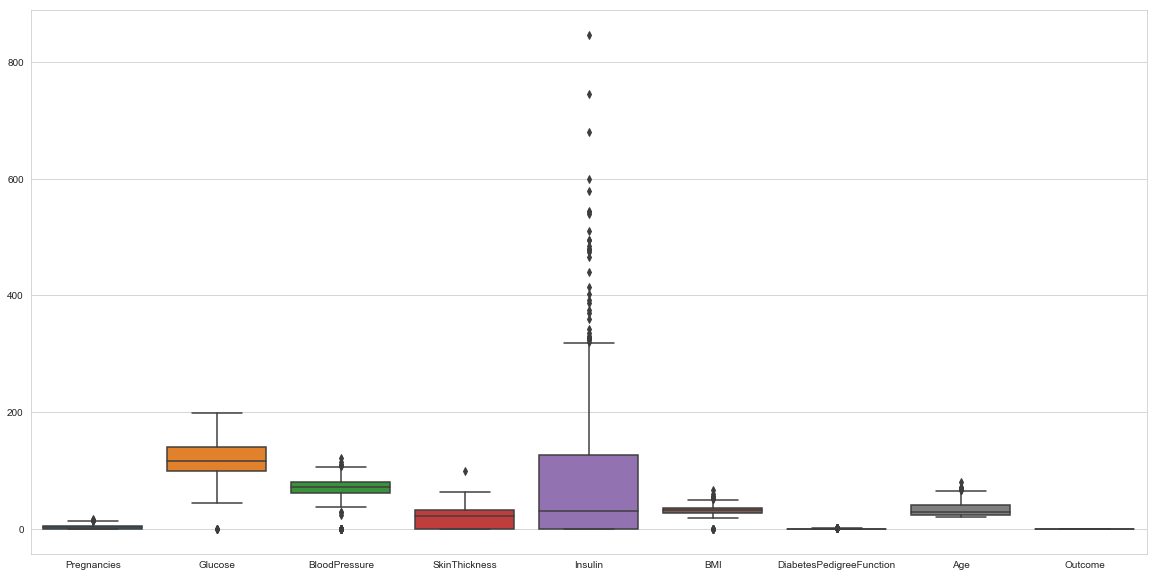

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

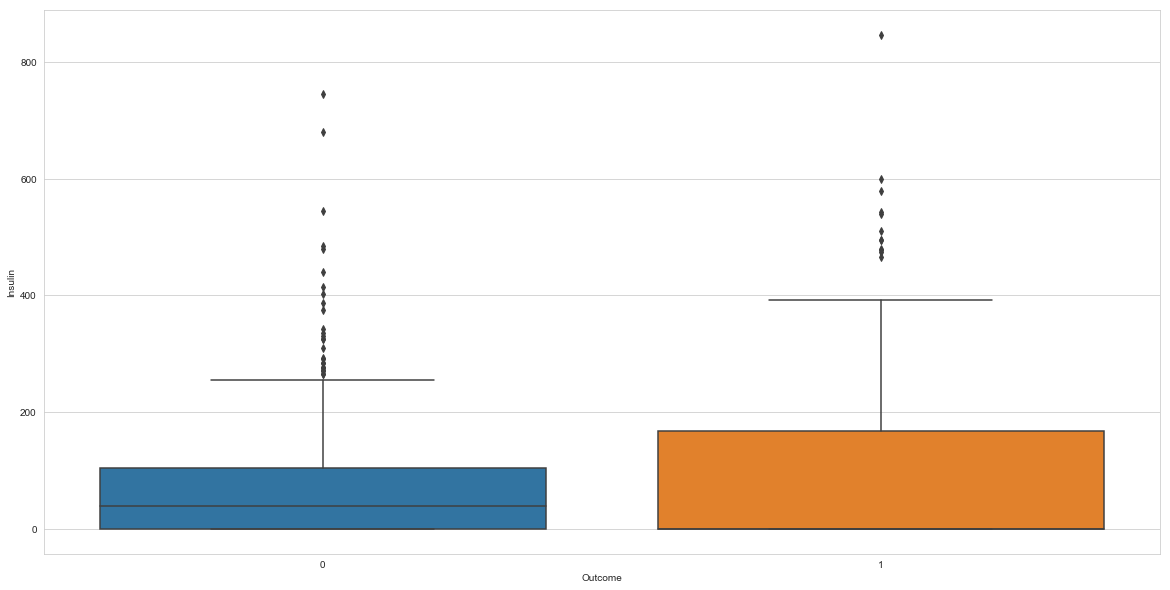

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Outcome',y='Insulin',data=data)

We now look into the boxplots with respects to the Outcome variable. This can be done by using the by= attribute. But first we will filter out the entries for which Insulin=0

In [8]:
data_new = data[data['Insulin']!=0]

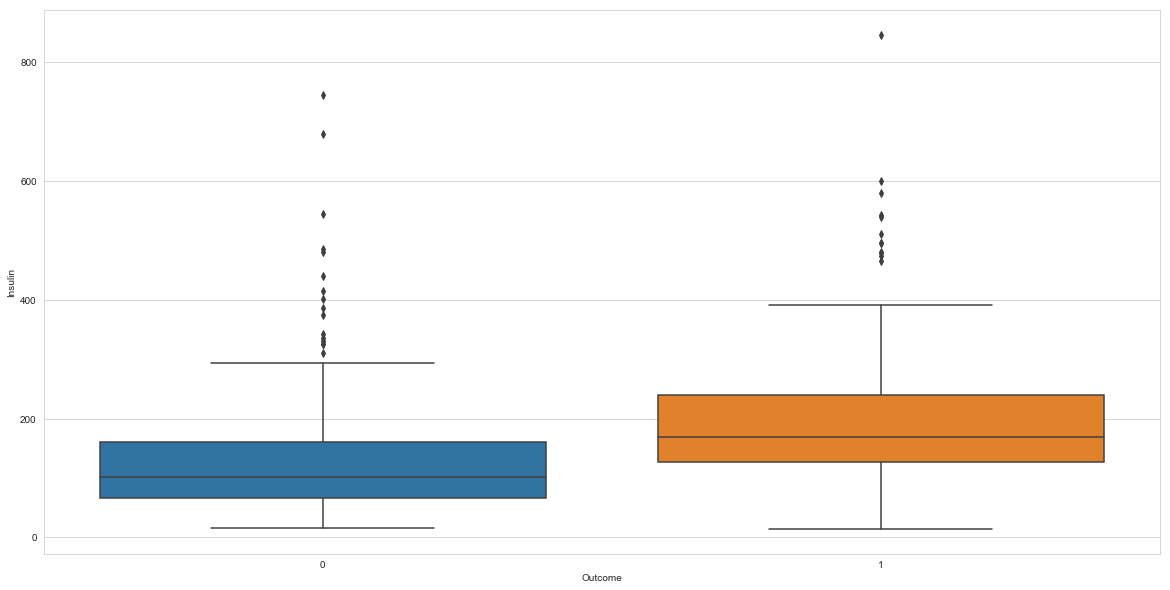

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Outcome',y='Insulin',data=data_new)

In the above plots we can see a lot of outliers. The extremely high levels of insulin

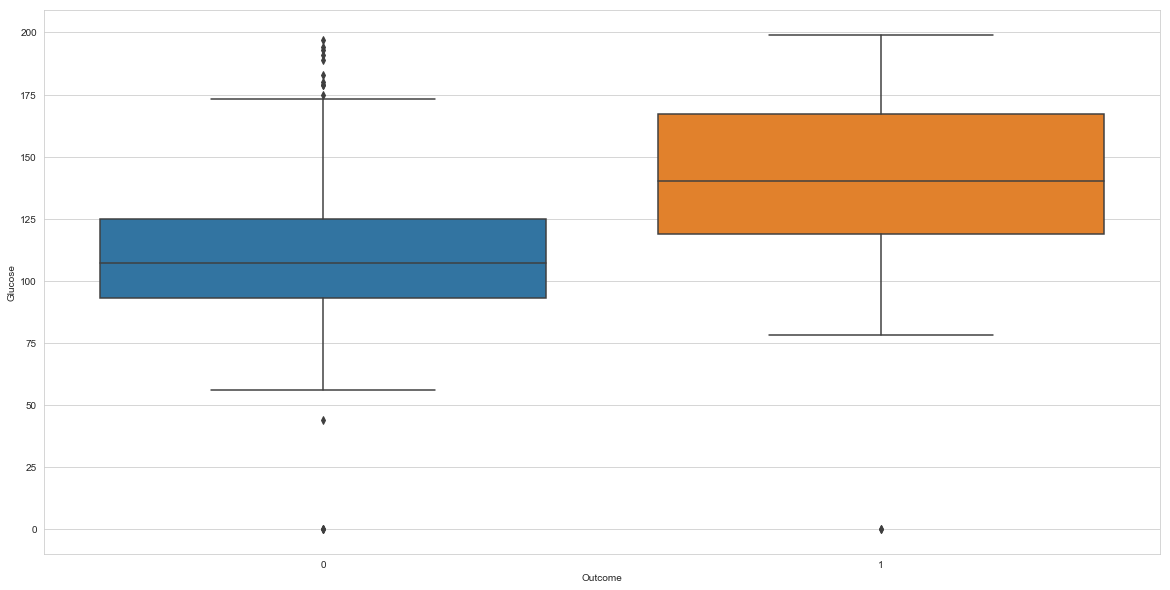

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Outcome',y='Glucose',data=data)

For the above plot we see that there are many outliers where Glucose=0. So lets filter out those entries and try to get an insight of the data.

In [14]:
data_new = data[data['Glucose']!=0]

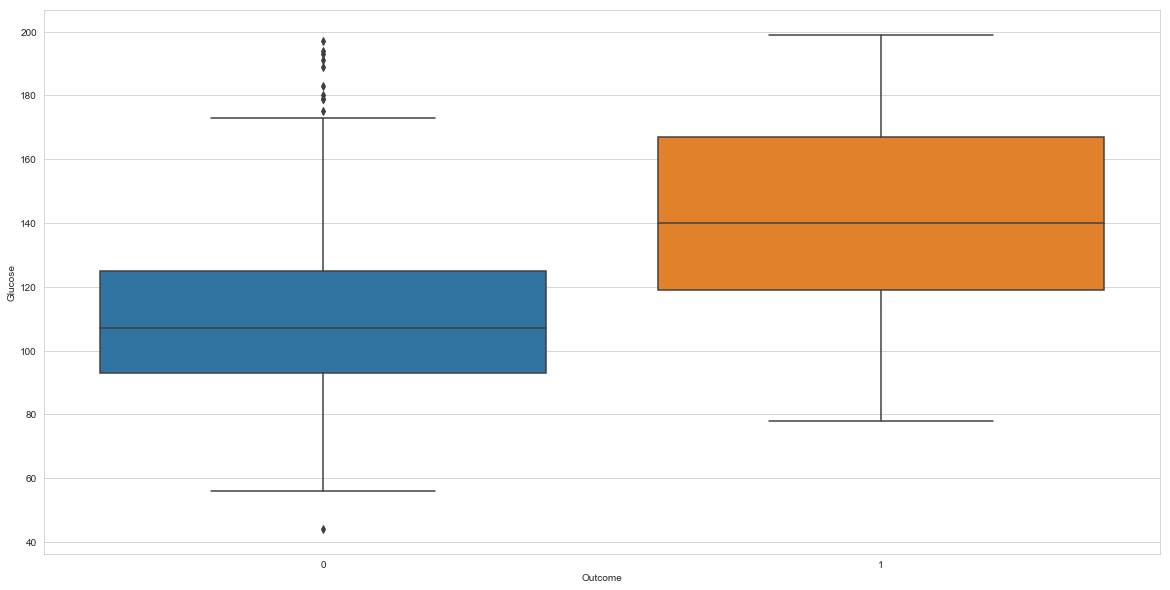

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Outcome',y='Glucose',data=data_new)

So now we get a clearer picture. For Outcome=1 the median is close to 140 and for Outcome=0 the median is close to 105 though having some outliers.

# Filling the zero values

Now in this data set we see a lot of zero values. What we can do is for better observations we can replace the zero values with the mean or median values of the columns. After that we look into the same results. So lets replace the zeroes with medians

In [30]:
data_new = pd.DataFrame()
data_new['Glucose'] = data['Glucose'].replace(0,data['Glucose'].median())
data_new['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data_new['BMI'] = data['BMI'].replace(0,data['BMI'].median())
data_new['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())
data_new['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data_new['Outcome'] = data['Outcome']

In [31]:
data_new.head()

,Glucose,Insulin,BMI,SkinThickness,BloodPressure,Outcome
0,148,30.5,33.6,35,72,1
1,85,30.5,26.6,29,66,0
2,183,30.5,23.3,23,64,1
3,89,94.0,28.1,23,66,0
4,137,168.0,43.1,35,40,1


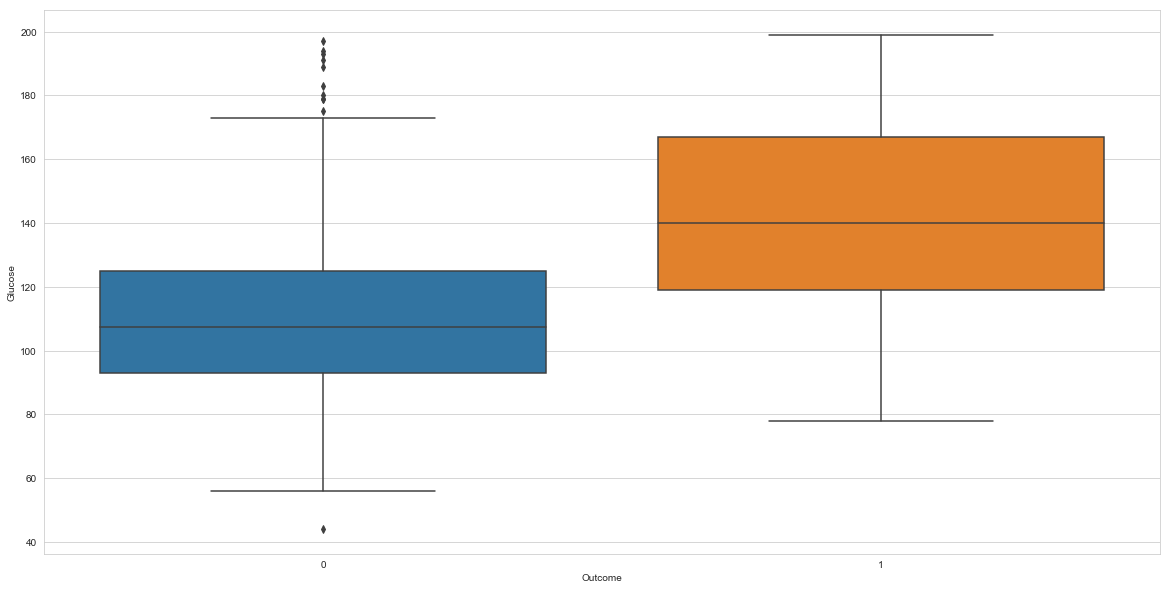

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Outcome',y='Glucose',data=data_new)

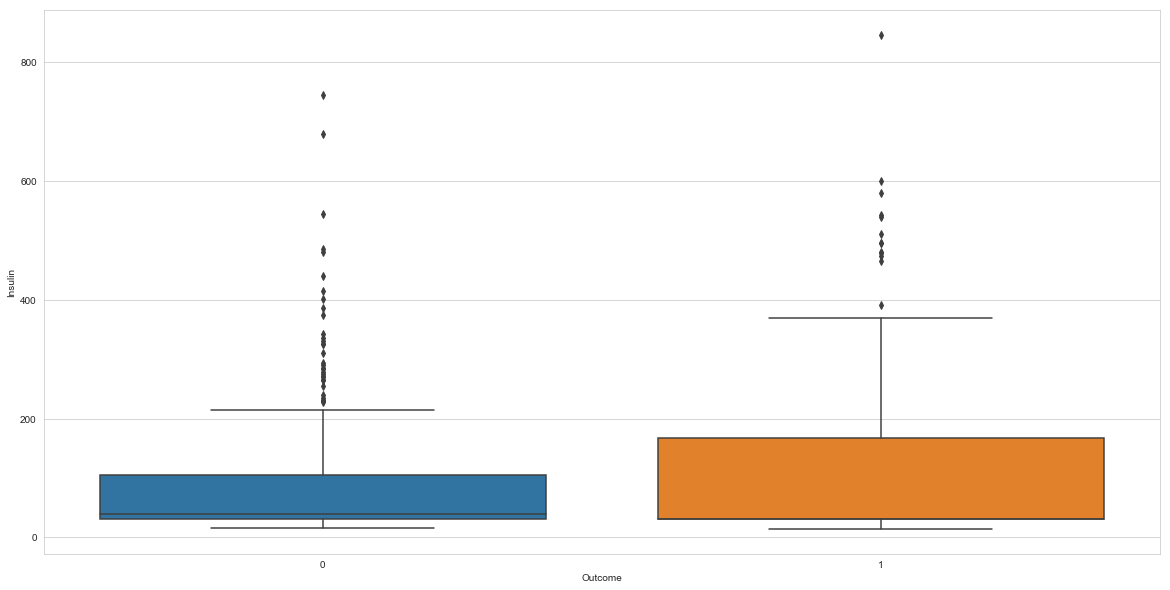

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Outcome',y='Insulin',data=data_new)

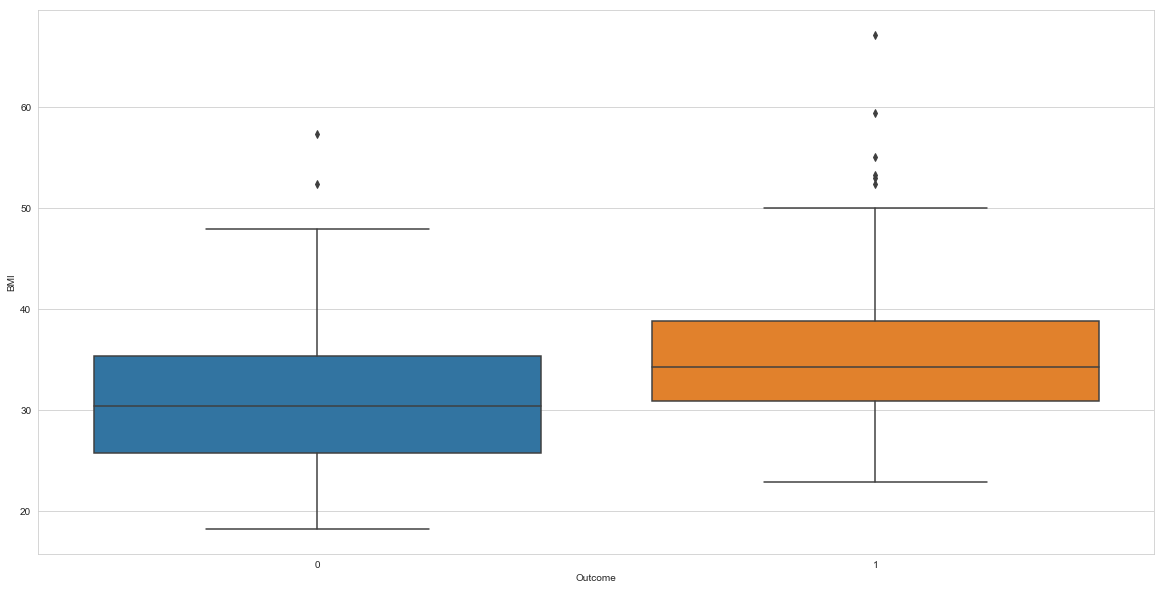

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Outcome',y='BMI',data=data_new)

In [36]:
iqr(data_new[(data_new['Outcome']==0)]['Glucose'],rng=(25,75))

32.0

In [37]:
iqr(data_new[(data_new['Outcome']==1)]['Glucose'],rng=(25,75))

48.0

In [38]:
iqr(data_new[(data_new['Outcome']==0)]['Insulin'],rng=(25,75))

74.5

In [39]:
iqr(data_new[(data_new['Outcome']==1)]['Insulin'],rng=(25,75))

136.75

We see changes in the Interquartile range for Insulin

# Violin Plots

A violin plot plays a similar role as a boxplot. It shows the distribution of data across several levels of one or more categorical variables such that those distributions can be compared. In box plot all of the plot components correspond to actual datapoints,whereas the violin plot features a kernel density estimation of the underlying distribution.

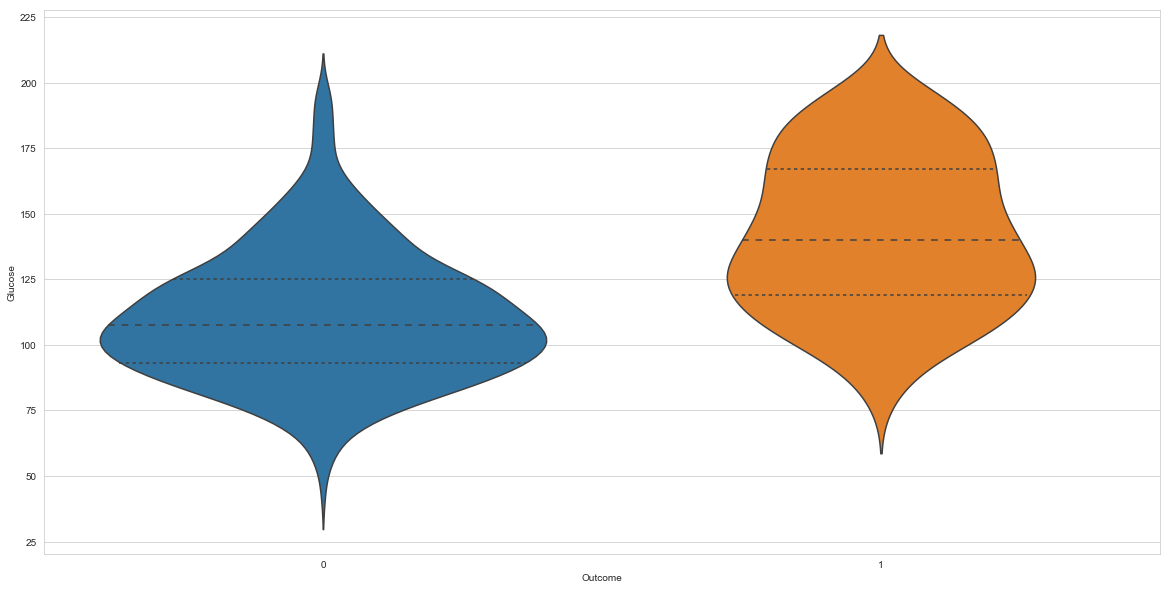

In [51]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Outcome',y='Glucose',data=data_new,inner='quartile')

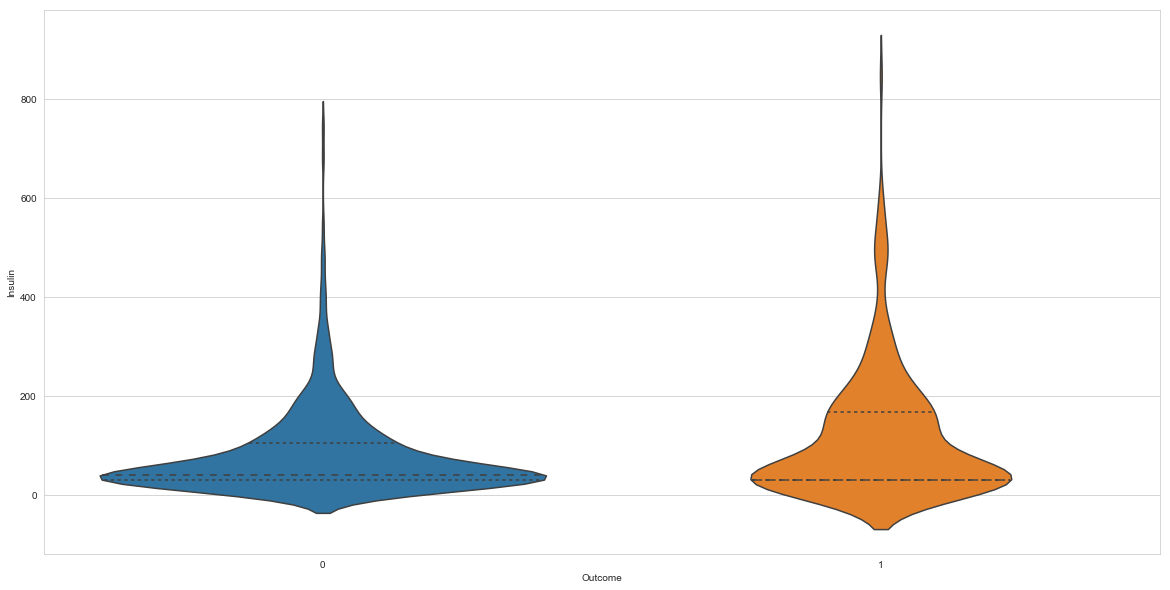

In [52]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Outcome',y='Insulin',data=data_new,inner='quartile')

# The End